In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, date
import seaborn as sns

# Load Data
* Handle missing values, duplicated values, outlier

In [3]:
total = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/saved_data.csv")
total['Date'] = pd.to_datetime(total['Date'])

df = total.set_index('Date')
df.head()

,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-16,30310.3,30299.2,30545.3,30134.6,34.48,840992.0,4.788780e+13,1866594.290,495223185.0,484205.915377,...,2119.29,100.03,0.090465,0.52089,2015.6,25.438,9023.5,4137.64,33885.31,28493.47
2023-04-15,30299.6,30472.6,30586.5,30208.8,31.71,1045660.0,4.788780e+13,1839875.354,631025193.0,630623.285367,...,2090.59,96.66,0.088890,0.51930,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
2023-04-14,30472.5,30387.4,30964.9,30026.0,98.38,1016042.0,4.788780e+13,1759535.436,559166432.0,858535.297189,...,2099.98,96.34,0.088707,0.52269,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
2023-04-13,30387.4,29892.4,30524.1,29864.5,65.87,1009669.0,4.788780e+13,1812112.549,567094231.0,767012.808110,...,2012.11,94.19,0.087344,0.51244,2041.3,25.925,9058.5,4146.22,34030.34,28156.97
2023-04-12,29886.4,30209.8,30473.0,29679.5,78.69,1056542.0,4.788780e+13,1933495.919,635037442.0,757368.783682,...,1916.58,92.02,0.083398,0.50473,2010.9,25.458,8916.5,4091.95,33647.22,28082.70


In [4]:
df.shape

(4654, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4654 entries, 2023-04-16 to 2010-07-20
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BTC_close                   4654 non-null   float64
 1   BTC_open                    4654 non-null   float64
 2   BTC_high                    4654 non-null   float64
 3   BTC_low                     4654 non-null   float64
 4   BTC_volume                  4654 non-null   float64
 5   Active_Addr_Cnt             4654 non-null   float64
 6   Difficulty                  4654 non-null   float64
 7   Mean_Block_Size(in_bytes)   4654 non-null   float64
 8   Sum_Block_Weight            4654 non-null   float64
 9   Total_Fees(USD)             4654 non-null   float64
 10  Mean_Hashrate               4654 non-null   float64
 11  Xfer_Cnt                    4654 non-null   float64
 12  Mean_Tx_size(native_units)  4654 non-null   float64
 13  ETH            

In [6]:
df.describe()

,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
count,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4.654000e+03,4.654000e+03,4.654000e+03,4.654000e+03,4.654000e+03,...,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000
mean,8950.828126,8944.396197,9182.648904,8680.543532,144.272183,4.974545e+05,7.399910e+12,6.883463e+05,3.329426e+08,5.498044e+05,...,505.010290,45.052975,0.026408,0.229873,1474.337129,21.657901,7112.199345,2492.349280,21487.496401,18751.425404
std,14517.759120,14515.100053,14900.138248,14078.916437,199.685947,3.731797e+05,1.103629e+13,4.990862e+05,2.151278e+08,1.528054e+06,...,945.449318,63.364718,0.069391,0.334681,253.778406,6.479395,1491.343889,989.044608,7511.506584,6322.971966
min,0.100000,0.100000,0.100000,0.000000,0.170000,4.080000e+02,1.820000e+02,4.164167e+02,2.841400e+05,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1049.600000,11.772000,0.000000,1047.220000,9985.810000,8160.010000
25%,140.475000,140.400000,145.800000,135.825000,25.407500,8.702175e+04,1.322172e+08,1.656955e+05,1.124594e+08,3.741492e+03,...,0.000000,0.000000,0.000000,0.000000,1260.025000,16.624500,5947.125000,1697.435000,15464.300000,14313.030000
50%,916.050000,915.050000,934.150000,877.350000,63.605000,5.389900e+05,2.840750e+11,7.887917e+05,4.066180e+08,6.090908e+04,...,12.430000,3.870000,0.000000,0.008870,1371.850000,19.570000,6962.000000,2204.720000,19161.280000,19435.830000
75%,9932.450000,9926.450000,10231.950000,9636.050000,158.375000,8.174050e+05,1.389755e+13,1.087807e+06,5.072356e+08,4.321621e+05,...,396.107500,67.199500,0.003335,0.350712,1721.025000,25.340750,8151.437500,3046.155000,26828.202500,22902.512500
max,67527.900000,67528.700000,68990.600000,66334.900000,999.530000,1.366494e+06,4.788780e+13,2.535436e+06,7.584308e+08,2.139776e+07,...,4808.380000,386.820000,0.686880,2.780000,2069.400000,48.599000,10674.000000,4796.560000,36799.650000,30670.100000


<Axes: >

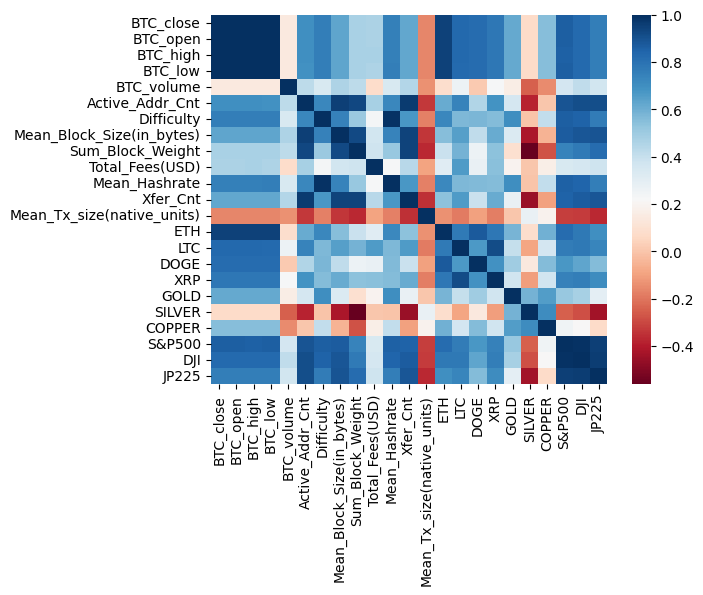

In [7]:
sns.heatmap(df.corr(), cmap="RdBu")

# Slpit Data (Testing, Training Data Sets)

In [8]:
from datetime import datetime

for index in total.index:
    total.loc[index, "Date"] = datetime.strptime(str(total.loc[index, "Date"])[:10], '%Y-%m-%d').date()

Start_day = date(2015, 12, 30)

Test_day = date(2018,3,10)

End_day = date(2018,9,30)

# train, test
total = total[(total["Date"] >= Start_day) & (total["Date"] <= End_day)].reset_index(drop = True)
train_dataset = total[total["Date"] < Test_day].reset_index(drop = True)
test_dataset = total[total["Date"] >= Test_day].reset_index(drop = True)


In [9]:
X_train = train_dataset.drop(["Date"], axis=1)[:-1]
y_train = train_dataset["BTC_close"][1:].reset_index(drop=True)

X_test = test_dataset.drop(["Date"], axis=1)[:-1]
y_test = test_dataset["BTC_close"][1:].reset_index(drop=True)

In [10]:
test_ratio = len(test_dataset) / len(total)

print("Tỉ lệ test_data/total:", test_ratio)

Tỉ lệ test_data/total: 0.20377733598409542


In [11]:
print("Kích thước X_train:", X_train.shape)
print("Kích thước y_train:", y_train.shape)
print("Kích thước X_test:", X_test.shape)
print("Kích thước y_test:", y_test.shape)

Kích thước X_train: (800, 23)
Kích thước y_train: (800,)
Kích thước X_test: (204, 23)
Kích thước y_test: (204,)


# Load Model

In [12]:
#import sklearn modules
import time
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

## Default

In [14]:
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

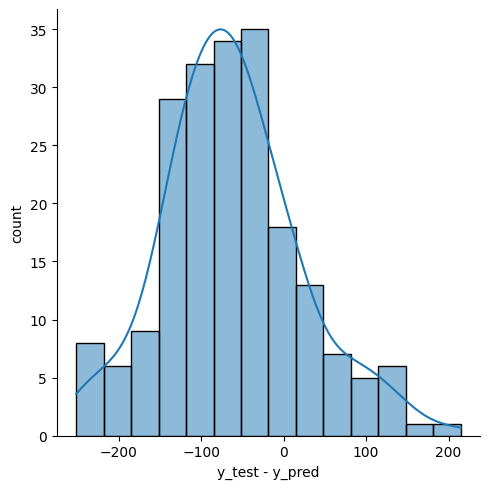

In [15]:

sns.displot(y_test - y_pred, kde=True)
plt.xlabel('y_test - y_pred')
plt.ylabel('count')
plt.show()

The distribution of my data tends to curve up on the right side, which means there are some values that are higher than predicted. This can happen when the data has outliers or when the distribution of the data does not follow a normal distribution.

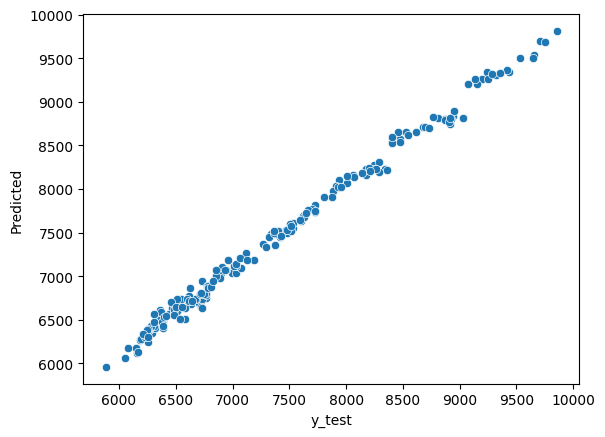

In [16]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('y_test')
plt.ylabel('Predicted')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
y_train_pred = rf.predict(X_train)

y_test = np.array(y_test)

def AUC(y_test, y_pred):
    count = 0
    for i in range(1,len(y_test)):
        if (y_test[i] - y_test[i-1]) * (y_pred[i] - y_pred[i-1]) > 0:
            count += 1
    return count/(len(y_test)-1)
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_train_pred)))

#MAPE
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train,y_train_pred))
print()

print("Test accuracy for test set")
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse)

#MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(" Mean Absolute Percentage Error (MAPE):", mape)
print()
AUC = AUC(y_test, y_pred)
#AUC
print("AUC test:", AUC)

Test accuracy for train set
Root Mean Square Error (RMSE): 32.858954332704286
Mean Absolute Percentage Error (MAPE): 0.0023327101916917428

Test accuracy for test set
Root Mean Square Error (RMSE): 104.7660161126815
 Mean Absolute Percentage Error (MAPE): 0.012236156885802315

AUC test: 0.8719211822660099


## Tuning 

In [18]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the range of values for n_estimators

n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
criterion = ['squared_error']
max_features = [None]
min_samples_split = [2]
min_samples_leaf = [1]
bootstrap = [True, False] # method used to sample data points

param_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'criterion': criterion,
            
''

'max_depth': max_depth,

'min_samples_split': min_samples_split,
              
'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': [None], 'criterion': ['squared_error'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'min_samples_split': [2], 'min_samples_leaf': [1], 'bootstrap': [True, False]}


### Randomized Search

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Create the RandomizedSearchCV object with early stopping
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = param_grid, scoring=scoring,
                                   cv=5, refit=True, verbose=2,
                                   n_jobs = -1, random_state=42)

In [20]:
rf_random.fit(X_train, y_train)

print ('Best Parameters: ', rf_random.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 14, 'criterion': 'squared_error', 'bootstrap': True}


## Using the best parameters

### Randomized Search

In [21]:
import time

start_time = time.time()

randmf = RandomForestRegressor(**rf_random.best_params_) 
randmf.fit(X_train, y_train) 

end_time = time.time()
all_rand_run_time = end_time - start_time

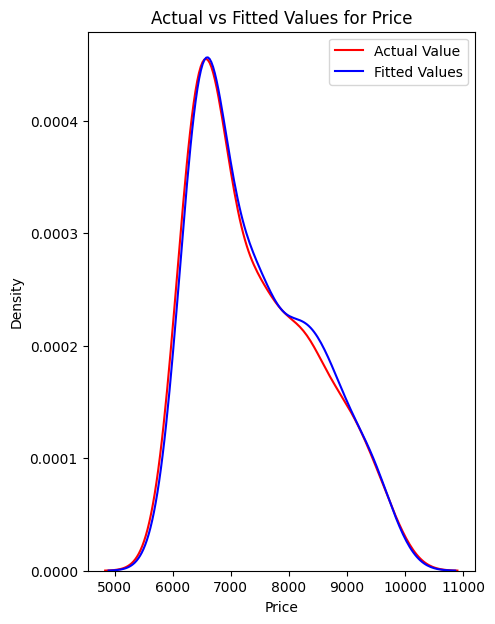

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_rand = randmf.predict(X_test)

plt.figure(figsize=(5, 7))

sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred_rand, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()


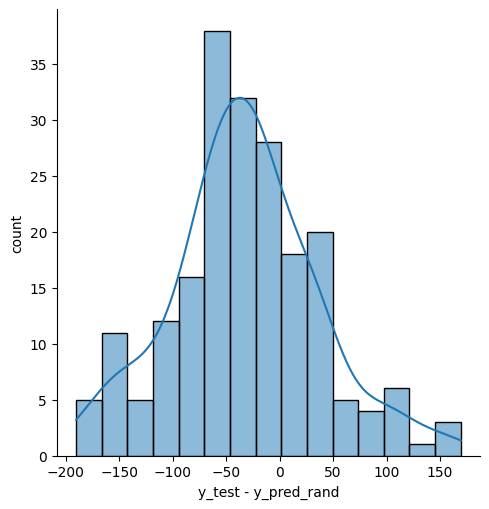

In [23]:

sns.displot(y_test - y_pred_rand, kde=True)
plt.xlabel('y_test - y_pred_rand')
plt.ylabel('count')
plt.show()

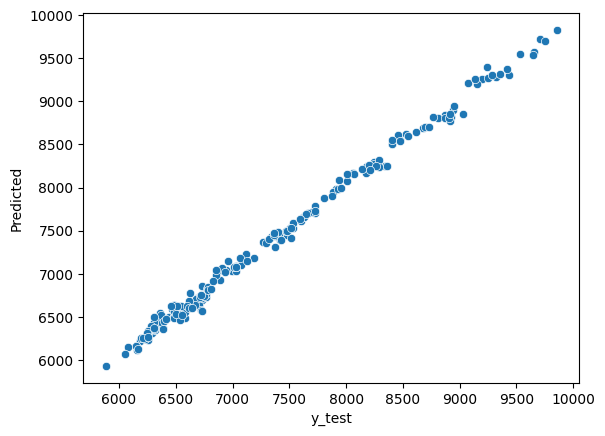

In [24]:
sns.scatterplot(x=y_test, y=y_pred_rand)
plt.xlabel('y_test')
plt.ylabel('Predicted')
plt.show()

Mostly linearly correlated.

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
y_train_rand_pred = randmf.predict(X_train)

y_test = np.array(y_test)

def AUC(y_test, y_pred):
    count = 0
    for i in range(1,len(y_test)):
        if (y_test[i] - y_test[i-1]) * (y_pred[i] - y_pred[i-1]) > 0:
            count += 1
    return count/(len(y_test)-1)
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_train_rand_pred)))

#MAPE
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train,y_train_rand_pred))
print()

print("Test accuracy for test set")
#RMSE
rmse_all_rand = np.sqrt(mean_squared_error(y_test, y_pred_rand))
print("Root Mean Square Error (RMSE):", rmse_all_rand)

#MAPE
mape_all_rand = mean_absolute_percentage_error(y_test, y_pred_rand)
print(" Mean Absolute Percentage Error (MAPE):", mape_all_rand)
print()
AUC_all_rand = AUC(y_test, y_pred_rand)
#AUC
print("AUC test:", AUC_all_rand)



Test accuracy for train set
Root Mean Square Error (RMSE): 34.35153529158987
Mean Absolute Percentage Error (MAPE): 0.002233223983528692

Test accuracy for test set
Root Mean Square Error (RMSE): 75.51837654779254
 Mean Absolute Percentage Error (MAPE): 0.008278210663065146

AUC test: 0.8916256157635468


## Feature Reduction

### Randomized Search

In [26]:
features_rand = X_train.columns
# Get numerical feature importances
importances_rand = list(randmf.feature_importances_)
# List of tuples with variable and importance
feature_importances_rand = [(feature, round(importance, 4)) for feature, importance in zip(features_rand, importances_rand)]
# Sort the feature importances by most important first
feature_importances_rand = sorted(feature_importances_rand, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
for pair in feature_importances_rand:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: BTC_open             Importance: 0.6408
Variable: BTC_high             Importance: 0.184
Variable: BTC_close            Importance: 0.088
Variable: BTC_low              Importance: 0.0795
Variable: S&P500               Importance: 0.002
Variable: DJI                  Importance: 0.0018
Variable: Difficulty           Importance: 0.0012
Variable: Total_Fees(USD)      Importance: 0.0012
Variable: JP225                Importance: 0.0005
Variable: ETH                  Importance: 0.0004
Variable: LTC                  Importance: 0.0003
Variable: XRP                  Importance: 0.0002
Variable: Mean_Block_Size(in_bytes) Importance: 0.0001
Variable: COPPER               Importance: 0.0001
Variable: BTC_volume           Importance: 0.0
Variable: Active_Addr_Cnt      Importance: 0.0
Variable: Sum_Block_Weight     Importance: 0.0
Variable: Mean_Hashrate        Importance: 0.0
Variable: Xfer_Cnt             Importance: 0.0
Variable: Mean_Tx_size(native_units) Importance: 0.0
Variable: 

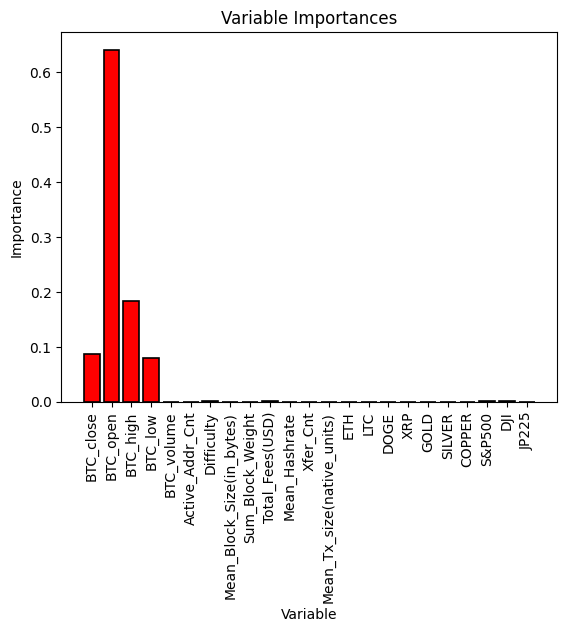

In [27]:
# list of x locations for plotting
x_values = list(range(len(importances_rand)))
# Make a bar chart
plt.bar(x_values, importances_rand, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, features_rand, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

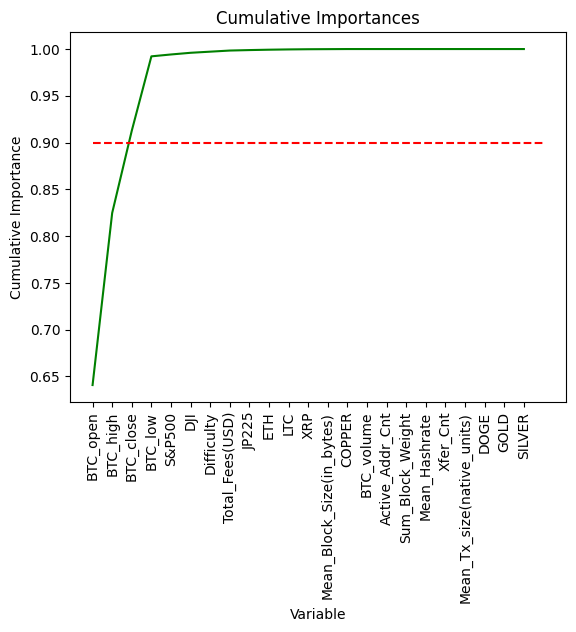

In [28]:
# List of features sorted from most to least important
sorted_importances_rand = [importance[1] for importance in feature_importances_rand]
sorted_features_rand = [importance[0] for importance in feature_importances_rand]
# Cumulative importances
cumulative_importances_rand = np.cumsum(sorted_importances_rand)
# Make a line graph
plt.plot(x_values, cumulative_importances_rand, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.9, xmin=0, xmax=len(sorted_importances_rand), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features_rand, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [29]:
# Find number of features for cumulative importance of 90%
# Add 1 because Python is zero-indexed
num_rand = np.where(cumulative_importances_rand > 0.9)[0][0] + 1
print('Number of features for 90% importance:', num_rand)

Number of features for 90% importance: 3


In [30]:
# Extract the names of the most important features
important_feature_names_rand = [feature[0] for feature in feature_importances_rand[0:num_rand]]
print(important_feature_names_rand)

['BTC_open', 'BTC_high', 'BTC_close']


In [31]:
train_data_rand = X_train[important_feature_names_rand]
test_data_rand = X_test[important_feature_names_rand]
# Sanity check on operations
print('Important train features shape:', train_data_rand.shape)
print('Important test features shape:', test_data_rand.shape)


Important train features shape: (800, 3)
Important test features shape: (204, 3)


#### Training and Evaluating on Important Features


### Randomized Search

In [32]:
start_time = time.time()

# Train the expanded model on only the important features
randmf.fit(train_data_rand, y_train);

# Make predictions on test data
predictions_rand = randmf.predict(test_data_rand)

end_time = time.time()
reduce_rand_run_time = end_time - start_time

#RMSE
from sklearn.metrics import mean_squared_error
rmse_reduce_rand = np.sqrt(mean_squared_error(y_test, predictions_rand))
print("RMSE:", rmse_reduce_rand)
print()

#MAPE
mape_reduce_rand = np.average(np.abs((y_test - predictions_rand) / y_test))
print("MAPE:", mape_reduce_rand)
print()

AUC_reduce_rand = AUC(np.array(y_test), predictions_rand)
print("AUC test:", AUC_reduce_rand )

RMSE: 64.12906701596349

MAPE: 0.006902000860084318

AUC test: 0.9359605911330049


## Summary statistical table

### Randomized Search

In [33]:
def print_results_rand(AUC_all_rand, rmse_all_rand, mape_all_rand, all_rand_run_time, 
                       AUC_reduce_rand, rmse_reduce_rand, mape_reduce_rand, reduce_rand_run_time):
    headers = ['Type', 'Number of Features','Accuracy', 'RMSE', 'MAPE', 'Run Time (s)']
    all_results = [['All', len(importances_rand), AUC_all_rand, rmse_all_rand, mape_all_rand, all_rand_run_time],
                   ['Reduce', len(important_feature_names_rand), AUC_reduce_rand, rmse_reduce_rand, mape_reduce_rand, reduce_rand_run_time]]
    
    # Calculate the maximum width for each column
    col_widths = [max(len(str(row[i])) for row in all_results + [headers]) for i in range(len(headers))]

    # Print table headers
    header_format = '  '.join(f"{{:<{width}}}" for width in col_widths)
    print(header_format.format(*headers))

    # Print separator row
    separator = '-' * (sum(col_widths) + 3 * (len(col_widths) - 1))
    print(separator)

    # Print table rows
    row_format = '  '.join(f"{{:<{width}}}" for width in col_widths)
    for result in all_results:
        index, num_features, AUC, rmse, mape, run_time = result
        print(row_format.format(index, num_features, AUC, rmse, mape, run_time))
        
print_results_rand(AUC_all_rand, rmse_all_rand, mape_all_rand, all_rand_run_time, 
                       AUC_reduce_rand, rmse_reduce_rand, mape_reduce_rand, reduce_rand_run_time)


Type    Number of Features  Accuracy            RMSE               MAPE                  Run Time (s)      
----------------------------------------------------------------------------------------------------------------
All     23                  0.8916256157635468  75.51837654779254  0.008278210663065146  7.737046003341675 
Reduce  3                   0.9359605911330049  64.12906701596349  0.006902000860084318  2.1994569301605225


# Graph Predicted Values with Test Set

### Randomized Search

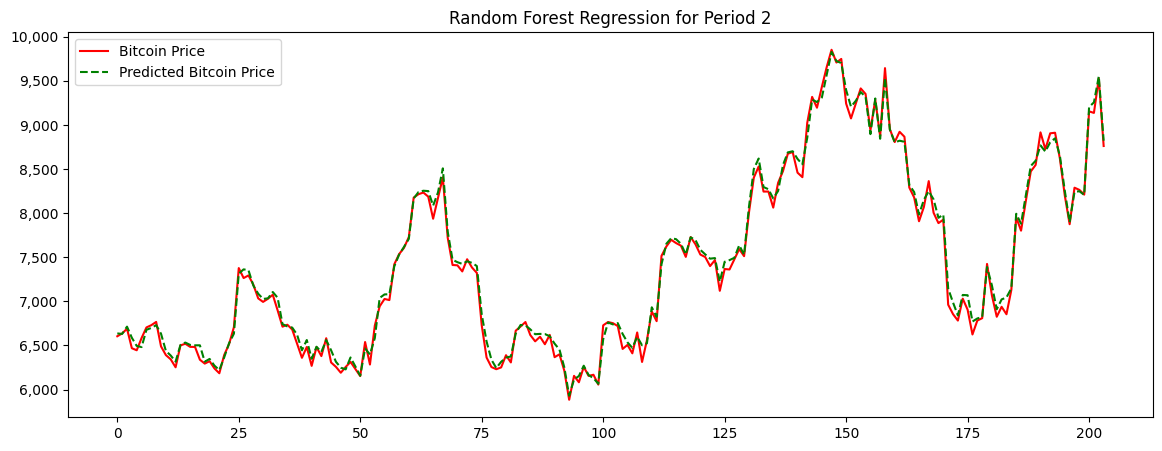

In [34]:

#hien thi ket qua du doan
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
ax.plot(y_test, color = 'red', label="Bitcoin Price")
ax.plot(y_pred_rand, color = 'green', label="Predicted Bitcoin Price", linestyle="dashed")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
plt.title("Random Forest Regression for Period 2")
plt.legend()
plt.show()

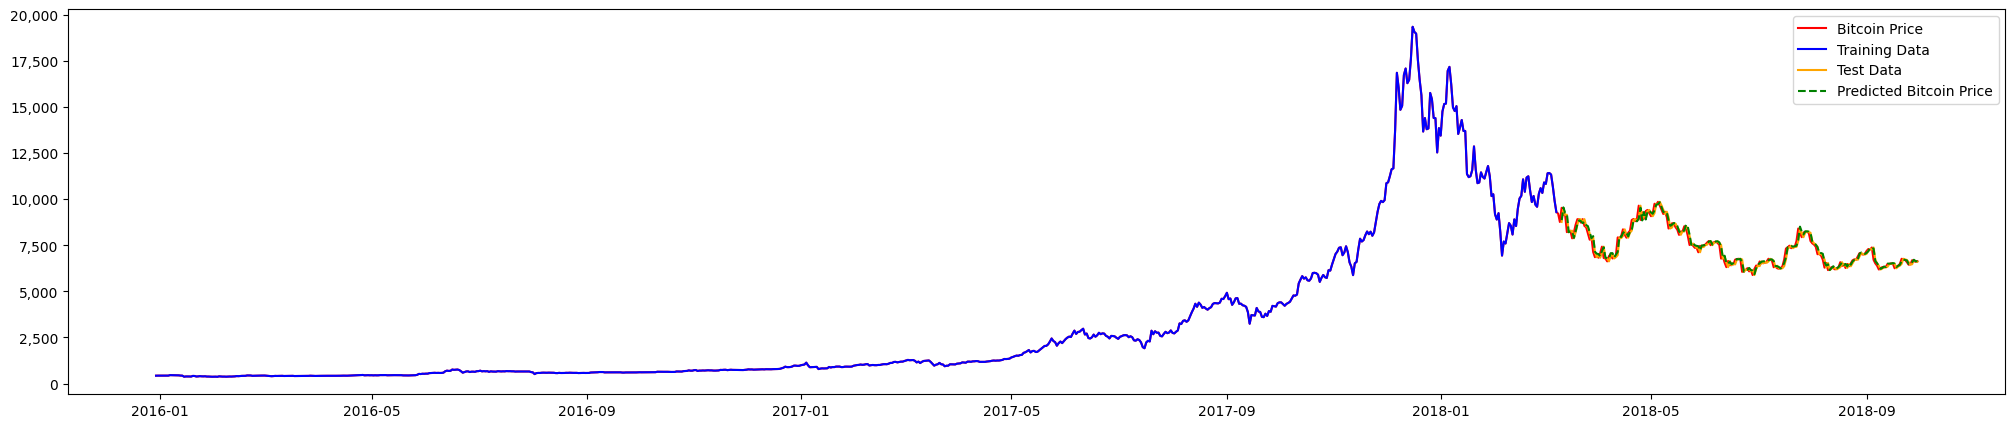

In [35]:
fig, ax = plt.subplots(figsize=(25, 5))

ax.plot(total['Date'], total['BTC_close'], color='red', label="Bitcoin Price")
ax.plot(total['Date'][-len(y_train):], y_train, color='blue', label="Training Data")
ax.plot(total['Date'][:len(y_test)], y_test, color='orange', label="Test Data")
ax.plot(total['Date'][:len(y_pred)], y_pred_rand, color='green', label="Predicted Bitcoin Price", linestyle="dashed")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # Định dạng đường trục y
plt.legend()
plt.show()


## Comparing randomized search for hyperparameter estimation

In [36]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

#### Randomized Search

In [37]:
print((len(rf_random.cv_results_["params"])))
report(rf_random.cv_results_)

10
Model with rank: 1
Mean validation score: -8671520.353 (std: 17215622.961)
Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 14, 'criterion': 'squared_error', 'bootstrap': True}

Model with rank: 2
Mean validation score: -8675940.743 (std: 17222203.129)
Parameters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'squared_error', 'bootstrap': True}

Model with rank: 3
Mean validation score: -8679165.016 (std: 17224306.335)
Parameters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'criterion': 'squared_error', 'bootstrap': True}

Model with rank: 4
Mean validation score: -8710930.406 (std: 17299063.552)
Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 8, 'criterion': 'squared_error', 'bootstrap': True}

Model with rank: 

In [38]:
#the parameters used in the RandomForestRegressor model
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Summary

| Metric     | DEFAULT | TUNING | NORMAL |
| ---------- | ------- | ------ | ------ |
| RMSE(min)  | 80.57   | 84.7   | 79.5   |
| MAPE%(min) | 0.009   | 0.009  | 0.009  |
| AUC/DA ~ 1 | 0.88    | 0.90   | 0.90   |

In [39]:
#Default
RandomForestRegressor(bootstrap = True, ccp_alpha = 0.0, criterion = 'squared_error' , max_depth = None, 
                      max_features = 1.0, max_leaf_nodes = None, max_samples = None, 
                      min_impurity_decrease = 0.0, min_samples_leaf = 1, min_samples_split = 2, 
                      min_weight_fraction_leaf = 0.0, n_estimators = 100, n_jobs = None, oob_score = False,
                      random_state = None, verbose = 0, warm_start = False)

#or you can write shorter
RandomForestRegressor()

RandomForestRegressor()

In [40]:
#Tuning & Normalization
RandomForestRegressor(n_estimators = 600, min_samples_split = 2, min_samples_leaf = 1, 
                      max_features = None, max_depth = 10, criterion = 'squared_error', bootstrap = True)

RandomForestRegressor(max_depth=10, max_features=None, n_estimators=600)

[CV] END bootstrap=True, criterion=squared_error, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.6s
[CV] END bootstrap=True, criterion=squared_error, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.5s
[CV] END bootstrap=False, criterion=squared_error, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=  10.5s
[CV] END bootstrap=False, criterion=squared_error, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=  10.1s
[CV] END bootstrap=False, criterion=squared_error, max_depth=16, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, criterion=squared_error, max_depth=16, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, criterio